<a href="https://colab.research.google.com/github/gmelaku/Assignment1/blob/master/MP10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

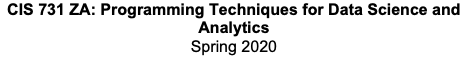

# 2. Setting up a search box

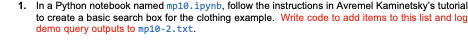

### 2.1 install pysolr

In [1]:
!pip install pysolr

     |████████████████████████████████| 61kB 2.2MB/s 
  Created wheel for pysolr: filename=pysolr-3.9.0-py2.py3-none-any.whl size=19670 sha256=ecbeeb96894c9e8440b84bcd179297639b70931315ebb573b1ce4bd1273b1939
  Stored in directory: /root/.cache/pip/wheels/e3/a3/bb/a73984d1ba1b89951b2b111a1d39a6e4827d559144670e3605
Successfully built pysolr


### 2.2 Install simplejson

In [0]:
from urllib.request import *

In [10]:
!pip install simplejson 

     |████████████████████████████████| 92kB 3.2MB/s 
  Created wheel for simplejson: filename=simplejson-3.17.0-cp36-cp36m-linux_x86_64.whl size=114200 sha256=e1b05173523ab6a2460bd4f8b890562df0b173c78a0004b6aae1394a3021a35d
  Stored in directory: /root/.cache/pip/wheels/86/c0/83/dcd0339abb2640544bb8e0938aab2d069cef55e5647ce6e097
Successfully built simplejson


Example 

In [0]:
from urllib.request import urlopen
import urllib.parse
import simplejson

def gallery_items(current_query):

    solr_tuples = [
        # text in search box
        ('q', "mens shirt gap"),
        # how many products do I want to return
        ('rows', current_query['rows_per_page']),
        # offset for pagination
        ('start', current_query['start_row'] * current_query['rows_per_page']),
        # example of a default sort, 
        # for search phrase leave blank to allow 
        # for relevancy score sorting
        ('sort', 'price asc, popularity desc'),
        # which fields do I want returned
        ('fl', 'product_title, price, code, image_file'),
        # enable facets and facet.pivots
        ('facet', 'on'),
        # allow for unlimited amount of facets in results
        ('facet.limit', '-1'),
        # a facet has to have at least one 
        # product in it to be a valid facet
        ('facet.mincount', '1'),
        # regular facets
        ('facet.fields', ['gender', 'style', 'material']),
        # nested facets
        ('facet.pivot', 'brand,collection'),
        # edismax is Solr's multifield phrase parser
        ('defType', 'edismax'),
        # fields to be queried
        # copyall: all facets of a product with basic stemming
        # copyallphonetic: phonetic spelling of facets
        ('qf', 'copyall copyallphonetic'),
        # give me results that match most fields
        # in qf [copyall, copyallphonetic]
        ('tie', '1.0'),
        # format response as JSON
        ('wt', 'json')
    ]

    solr_url = 'http://localhost:<port>/solr/<core>/select?'
    # enocde for URL format
    encoded_solr_tuples = urllib.parse.urlencode(solr_tuples)
    complete_url = solr_url + encoded_solr_tuples
    connection = urlopen(complete_url)
    raw_response = simplejson.load(connection)

### 2.3 url encode

In [0]:
def apply_facet_filters(self):
        if self.there_are_facets():
            for facet, facet_arr in self.facet_filter.items():
                if len(facet_arr) > 0:
                    new_facet_arr = []
                    for a_facet in facet_arr:
                        new_facet_arr.append("{0}: \"{1}\"".format(facet, a_facet))
                    self.solr_args.append(('fq', ' OR '.join(new_facet_arr)))

### 2.4 setting the minimum number of products required

In [0]:
import more_itertools as mit
facets = {}

for k,v in raw_response['facet_counts']['facet_fields'].items():
    spec_list = [list(spec) for spec in mit.chunked(v, 2)]
    spec_dict = {}
    for spec in spec_list:
        spec_dict[spec[0]] = spec[1]
    facets[k] = spec_dict

raw_response['facet_counts']['facet_fields'] = facets

### 2.5 Schema modelling 

In [0]:
<fieldType name="facets" class="solr.TextField">
        <analyzer>
          <tokenizer class="solr.ClassicTokenizerFactory"/>
          <filter class="solr.LowerCaseFilterFactory"/>
          <filter class="solr.StopFilterFactory"/>
          <filter class="solr.ClassicFilterFactory"/>
          <filter class="solr.EnglishMinimalStemFilterFactory"/>
        </analyzer>
      </fieldType>

### 2.6 Create copy fields 

In [17]:
{
       "add-copy-field":{
           "source":"brand",
           "dest":"copyall"
        }
    }

{'add-copy-field': {'dest': 'copyall', 'source': 'brand'}}